In [1]:
# Reference: Deep learning for Engineers by Brown University

import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(1234)

In [9]:
# Input data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = torch.square(x)
y = y + 0.1*torch.rand(y.size())


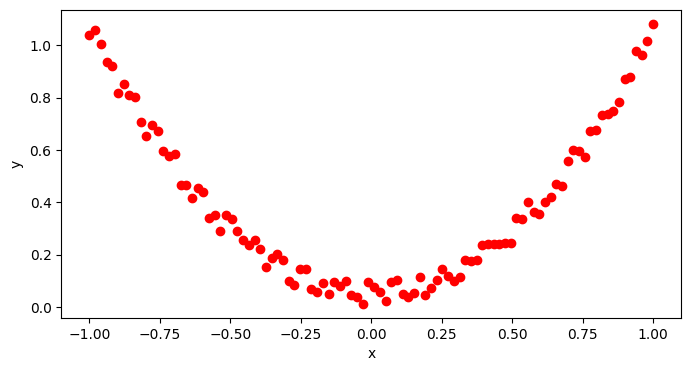

In [13]:
# Plot the data
plt.figure(figsize=(8,4))

x_plot, y_plot = x.numpy(), y.numpy()
plt.scatter(x_plot, y_plot, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show("Data for regression analysis")
plt.show()

Doing Iterations: 0 and Loss: 0.2028791308403015
Doing Iterations: 50 and Loss: 0.0016270959749817848
Doing Iterations: 100 and Loss: 0.0008850038284435868
Doing Iterations: 150 and Loss: 0.00083458999870345
Doing Iterations: 200 and Loss: 0.0008196521084755659
Doing Iterations: 250 and Loss: 0.0008126068278215826
Doing Iterations: 300 and Loss: 0.0008078496903181076


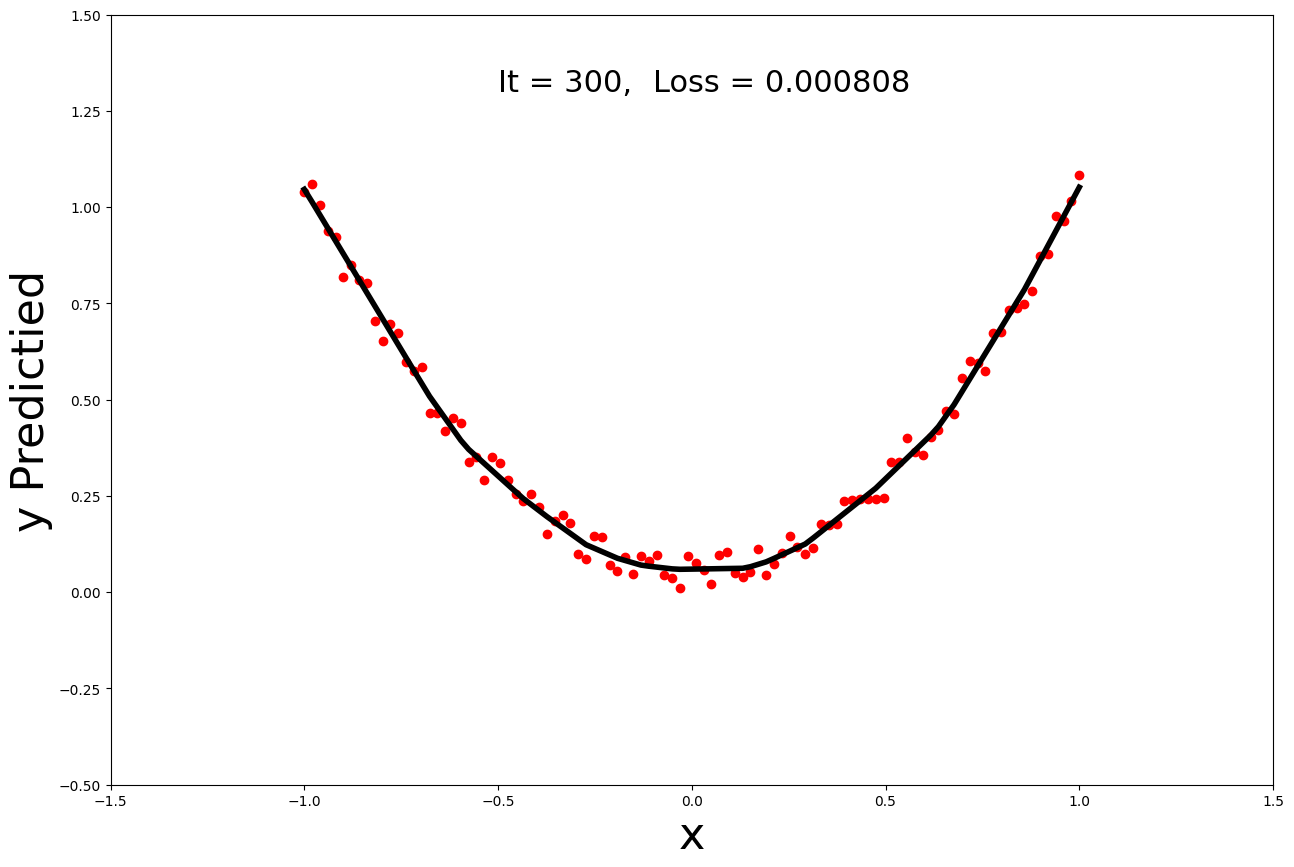

In [14]:
#### Training Routine
import matplotlib.pyplot as plt
import torch

Net = torch.nn.Sequential(
    torch.nn.Linear(1, 100),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(100, 1)
)

optimizer = torch.optim.Adam(Net.parameters(), lr=0.01)
loss_function = torch.nn.MSELoss()

image_list = []
Niter = 300 + 1

fig, ax = plt.subplots(figsize=(15, 10))

for it in range(Niter):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if it % 50 == 0:
        print(f"Doing Iterations: {it} and Loss: {loss}")
    plt.cla()
    ax.set_xlabel('x', fontsize=32)
    ax.set_ylabel('y Predictied', fontsize=32)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.scatter(x_plot, y_plot, color = "red")
    ax.plot(x_plot, y_pred.data.numpy(), 'k-', lw=4)
    ax.text(-0.5, 1.3, 'It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
    ax.text(-0.1, 1.3, 'Loss = %.6f' % loss.data.numpy(),
            fontdict={'size': 22, 'color':  'black'})

    fig.canvas.draw()      
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    image_list.append(image)
    
   

imageio.mimsave('./Parabolic_regression_3.gif', image_list, duration=200)